In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
"""Veri içerisinde eksik değer yok ancak aykırı değerler var. 
Glikoz ve Insuline gibi değişkenler 0 olamazlar. Bu değerleri tahmin yoluyla doğru değere en yakın noktaya çekilir.
Bu nedenle bu değer ilk etapta NaN haline getirilir
""" 
col = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI",]
df = df[col].replace(0,np.nan)
df.isnull().sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [6]:
from sklearn.impute import KNNImputer

In [7]:
data = pd.read_csv("diabetes.csv")
df["Age"]=data["Age"]
df["Outcome"]=data["Outcome"]
df["Pregnancies"]=data["Pregnancies"]
df["DiabetesPedigreeFunction"]=data["DiabetesPedigreeFunction"]


In [8]:
knn = KNNImputer(n_neighbors=5)
new_df = pd.DataFrame(knn.fit_transform(df),columns=df.columns)
new_df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Age                         0
Outcome                     0
Pregnancies                 0
DiabetesPedigreeFunction    0
dtype: int64

In [9]:
#veri seti içerisinde kategorik ve nümerik verileri ayırmmak için bir foksiyon yazılır
def cat_num(df,low=10):
    cat_col =[]
    num_col = []
    for i in df.columns:
        if str(df[i].dtype).startswith("object"):
            cat_col.append(i)
        elif (df[i].nunique() < 10) & (str(df[i].dtype).startswith("float64")) | (str(df[i].dtype).startswith("int64")):
            cat_col.append(i)
        elif(df[i].nunique()>low):
            num_col.append(i)
    return cat_col,num_col

cat_col,num_col = cat_num(new_df)

<Axes: xlabel='Outcome'>

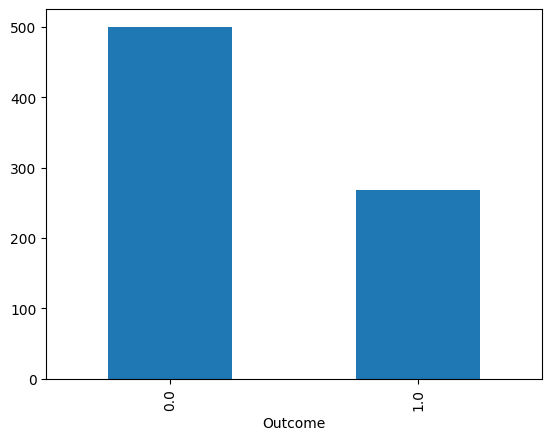

In [10]:
#numerik ve kategorik veriler analiz edilir
new_df["Outcome"].value_counts().plot.bar()

<Axes: >

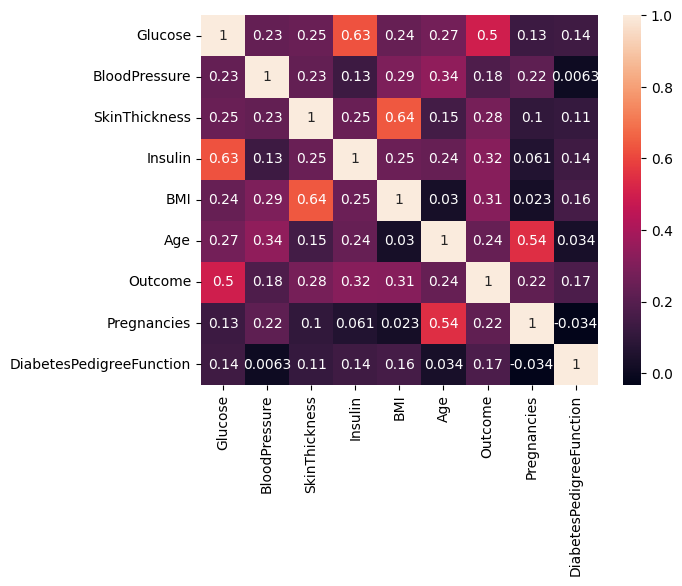

In [11]:
data_corr = new_df.corr()
sns.heatmap(data=data_corr,annot=True)

<Axes: xlabel='Glucose', ylabel='BMI'>

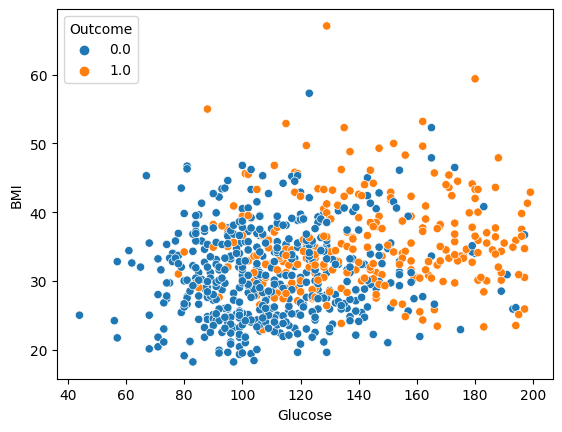

In [12]:
sns.scatterplot(data=new_df,x="Glucose",y="BMI",hue="Outcome")

In [23]:
y = new_df["Outcome"]

In [25]:
#Nümerik değişkenler için standartlaştırma yapılır
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(new_df)
data = pd.DataFrame(data=data,columns=new_df.columns)
x = data.drop("Outcome",axis=1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Pregnancies,DiabetesPedigreeFunction
0,0.866296,-0.030443,0.624914,0.160899,0.170392,1.425995,0.639947,0.468492
1,-1.200858,-0.522308,-0.012166,-0.961951,-0.846739,-0.190672,-0.844885,-0.365061
2,2.014715,-0.686263,-0.351943,0.116148,-1.326243,-0.105584,1.233880,0.604397
3,-1.069610,-0.522308,-0.649247,-0.601907,-0.628782,-1.041549,-0.844885,-0.920763
4,0.505364,-2.653723,0.624914,0.150728,1.550784,-0.020496,-1.141852,5.484909
...,...,...,...,...,...,...,...,...
763,-0.675867,0.297467,2.005255,0.272777,0.068679,2.532136,1.827813,-0.908682
764,0.013185,-0.194398,-0.224527,0.120216,0.635366,-0.531023,-0.547919,-0.398282
765,-0.019627,-0.030443,-0.649247,-0.418833,-0.904861,-0.275760,0.342981,-0.685193
766,0.144432,-1.014173,0.646150,-0.193043,-0.338173,1.170732,-0.844885,-0.371101


In [26]:
#model oluşturulur
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model =  RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy =  accuracy_score(y_test,y_pred)
accuracy


0.7402597402597403

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

# Model performansını değerlendirelim
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7142857142857143